**ADVANCE PROGRAMMING PROJECT**

**BIG DATA ANALYTICS**

**Rabiatul Adawiyah**





**KAGGLE COMPETITION**

*  House Prices - Advanced Regression Techniques
*  Predict sales prices and practice feature engineering, RFs, and gradient boosting

[**Download the dataset from Kaggle**](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)



**THE FLOW OF ANALYSIS**

****

**CLEANING DATA**
* Checking the missing value
* Fullfill the missing value using mean, mode, and 0
* Categorical using dummies
* Standar scaler

****
**METHODS**
* Lasso Regression
* xgboost regression
* Random forest 
* Decision Tree
* KNN
****

**COMPARE THE RESULT**

* RMSE
* Test score
* Train score

****
**PREDICT USING THE HIGHEST SCORE**







In [13]:
#!pip install kaggle

In [14]:
#!mkdir ~/.kaggle

In [15]:
#!cp kaggle.json ~/.kaggle/

In [16]:
#! chmod 600 ~/.kaggle/kaggle.json

In [17]:
#! kaggle datasets list

In [18]:
#! kaggle competitions download -c house-prices-advanced-regression-techniques

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import drive

In [20]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
#load the data
train=pd.read_csv("/content/drive/MyDrive/SGGW/Semester 1/Advance Programming/train.csv")
test=pd.read_csv("/content/drive/MyDrive/SGGW/Semester 1/Advance Programming/test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
#cheking the shape of dataset
train.shape, test.shape

((1460, 81), (1459, 80))

In [23]:
#combining the data train and test
test['SalePrice']=1
data=train.append(test)

In [24]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
#cheking data's shape after combining
data.shape

(2919, 81)

**CLEANING THE DATA**


In [26]:
str(list(data.columns))

"['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [28]:
#percentage of missing value
for col in data.columns:
    missing = np.mean(data[col].isnull())
    percentage=('{} - {}%'.format(col,round(missing*100)))
    #percentage.sort_values()
    print(percentage)

Id - 0%
MSSubClass - 0%
MSZoning - 0%
LotFrontage - 17%
LotArea - 0%
Street - 0%
Alley - 93%
LotShape - 0%
LandContour - 0%
Utilities - 0%
LotConfig - 0%
LandSlope - 0%
Neighborhood - 0%
Condition1 - 0%
Condition2 - 0%
BldgType - 0%
HouseStyle - 0%
OverallQual - 0%
OverallCond - 0%
YearBuilt - 0%
YearRemodAdd - 0%
RoofStyle - 0%
RoofMatl - 0%
Exterior1st - 0%
Exterior2nd - 0%
MasVnrType - 1%
MasVnrArea - 1%
ExterQual - 0%
ExterCond - 0%
Foundation - 0%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinSF1 - 0%
BsmtFinType2 - 3%
BsmtFinSF2 - 0%
BsmtUnfSF - 0%
TotalBsmtSF - 0%
Heating - 0%
HeatingQC - 0%
CentralAir - 0%
Electrical - 0%
1stFlrSF - 0%
2ndFlrSF - 0%
LowQualFinSF - 0%
GrLivArea - 0%
BsmtFullBath - 0%
BsmtHalfBath - 0%
FullBath - 0%
HalfBath - 0%
BedroomAbvGr - 0%
KitchenAbvGr - 0%
KitchenQual - 0%
TotRmsAbvGrd - 0%
Functional - 0%
Fireplaces - 0%
FireplaceQu - 49%
GarageType - 5%
GarageYrBlt - 5%
GarageFinish - 5%
GarageCars - 0%
GarageArea - 0%
GarageQu

In [29]:
#The categorical data
categorical=[i for i in data.columns 
             if data.dtypes[i]=='object']

In [30]:
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 43 categorical variables

The categorical variables are :

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [31]:
data[categorical].isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [32]:
#checking for every variable that has high missing value
data['Alley'].value_counts() #NA is no allay access

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [33]:
data['PoolQC'].value_counts() #NA is no pool

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [34]:
data['Fence'].value_counts() #NA is no fence

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [35]:
data['MiscFeature'].value_counts() #NA is no MiscFeature

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [36]:
data['FireplaceQu'].value_counts() #NA is no FireplaceQu

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [37]:
data['BsmtQual'].value_counts() #NA is no BsmtQual 

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [38]:
data['BsmtCond'].value_counts() #NA is no BsmtCond 

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [39]:
data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [40]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [41]:
data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [42]:
data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [43]:
data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [44]:
data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [45]:
data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [46]:
data['BsmtFullBath']. value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [47]:
data['BsmtHalfBath']. value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [48]:
data['KitchenAbvGr'].value_counts()

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

In [49]:
data['GarageCars'].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [50]:
#Fill the missing Value with mode

data['MSZoning'].fillna("RL", inplace = True)
data.Alley.fillna("NO", inplace = True)
data.PoolQC.fillna("No", inplace = True)
data.Fence.fillna("No", inplace = True)
data.MiscFeature.fillna("No", inplace = True)
data.BsmtCond.fillna("No", inplace=True)
data.BsmtQual.fillna("No", inplace=True)
data.BsmtExposure.fillna("NB", inplace=True)
data.BsmtFinType1.fillna("NB", inplace=True)
data.BsmtFinType2.fillna("NB", inplace=True)
data.GarageQual.fillna("No", inplace = True)
data.GarageCond.fillna("No", inplace = True)
data.GarageFinish.fillna("No", inplace = True)
data.GarageType.fillna("No", inplace = True)
data.FireplaceQu.fillna("No", inplace = True)
data.MasVnrType.fillna("None", inplace = True)
data.Utilities.fillna("AllPub", inplace = True)
data.Exterior1st.fillna("VinylSd", inplace = True)
data.Exterior2nd.fillna("VinylSd", inplace = True)
data.Electrical.fillna("SBrkr", inplace=True)
data.KitchenQual.fillna("TA", inplace=True)
data.Functional.fillna("Typ", inplace=True)
data.SaleType.fillna("WD", inplace=True)

In [51]:
#checking the missing value after filling with mode
data[categorical].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [52]:
#numerical data

numerical = [var for var in data.columns if data[var].dtypes!='object'] 
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are:\n\n', numerical)

There are 38 numerical variables

The numerical variables are:

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [53]:
#Missing value in numerical
data[numerical].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [54]:
#Filling the missing value with its mean
#miss_numb=['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars','GarageArea',
#           'BsmtFullBath','BsmtHalfBath','GarageYrBlt']


data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace = True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace = True)
data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean(), inplace = True)
data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean(), inplace = True)
data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean(), inplace = True)
data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean(), inplace = True)
data['GarageCars'].fillna(data['GarageCars'].mean(), inplace = True)
data['GarageArea'].fillna(data['GarageArea'].mean(), inplace = True)
data['BsmtFullBath'].fillna(data['BsmtFullBath'].mean(), inplace = True)
data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mean(), inplace = True)
data['GarageYrBlt'].fillna(0, inplace = True)

    

In [55]:
#Changing some variables data type
data['MSSubClass']= data['MSSubClass'].apply(str)
#data.BsmtFullBath.replace(3.0, 2.0, inplace=True)
data.BsmtFullBath = data.BsmtFullBath.astype('int')
data.BsmtHalfBath=data.BsmtHalfBath.astype('int')
data.GarageCars=data.GarageCars.astype('int')
data['GarageYrBlt'] = data.GarageYrBlt.apply(lambda row: 'recent' if row >= 2000 else 'old')
data.LotFrontage.astype('int')


0        65
1        80
2        68
3        60
4        84
       ... 
1454     21
1455     21
1456    160
1457     62
1458     74
Name: LotFrontage, Length: 2919, dtype: int64

In [56]:
#Feature Engineering
data['BsmtFinSF'] = data.BsmtFinSF1 + data.BsmtFinSF2 #finished square feet
data['Porch'] = data.ScreenPorch + data.EnclosedPorch + data.OpenPorchSF + data.WoodDeckSF + data['3SsnPorch']
data['Total_surface'] = data.TotalBsmtSF + data['1stFlrSF'] + data['2ndFlrSF']
data['Age'] = data.YrSold - data.YearBuilt
data['RemodAge'] = data.YrSold - data.YearRemodAdd

In [57]:
#drop data in feature Eng
drop=['BsmtFinSF1','BsmtFinSF2','ScreenPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF',
      'TotalBsmtSF','1stFlrSF','2ndFlrSF','3SsnPorch','YrSold','YearBuilt','YearRemodAdd']

In [58]:
data.drop(drop, inplace = True, axis=1)

In [59]:
data['GrLivArea'].replace(0, data['GrLivArea'].mean(), inplace = True)
data['GarageArea'].replace(0, data['GarageArea'].mean(), inplace = True)
data['SalePrice'].replace(0, data['SalePrice'].mean(), inplace = True)
data['BsmtFinSF'].replace(0, data['BsmtFinSF'].mean(), inplace = True)
data['Total_surface'].replace(0, data['Total_surface'].mean(), inplace = True)

In [60]:
data.isnull().value_counts()

Id     MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  BsmtUnfSF  Heating  HeatingQC  CentralAir  Electrical  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  MoSold  SaleType  SaleCondition  SalePrice  BsmtFinSF  Porch  Total_surface  Age    RemodAge
False  False       False     False        False    False   False  False     False        False      False      False      False         False       False       False 

In [61]:
data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,BsmtFinSF,Porch,Total_surface,Age,RemodAge
0,1,60,RL,65.0,8450,Pave,NO,Reg,Lvl,AllPub,...,0,2,WD,Normal,208500,706.0,61,2566.0,5,5
1,2,20,RL,80.0,9600,Pave,NO,Reg,Lvl,AllPub,...,0,5,WD,Normal,181500,978.0,298,2524.0,31,31
2,3,60,RL,68.0,11250,Pave,NO,IR1,Lvl,AllPub,...,0,9,WD,Normal,223500,486.0,42,2706.0,7,6
3,4,70,RL,60.0,9550,Pave,NO,IR1,Lvl,AllPub,...,0,2,WD,Abnorml,140000,216.0,307,2473.0,91,36
4,5,60,RL,84.0,14260,Pave,NO,IR1,Lvl,AllPub,...,0,12,WD,Normal,250000,655.0,276,3343.0,8,8


**VARIABEL** **DUMMY**

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [63]:
cate=data.select_dtypes(include='object')
numb=data.select_dtypes(exclude='object')

In [64]:
cate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   object
 1   MSZoning       2919 non-null   object
 2   Street         2919 non-null   object
 3   Alley          2919 non-null   object
 4   LotShape       2919 non-null   object
 5   LandContour    2919 non-null   object
 6   Utilities      2919 non-null   object
 7   LotConfig      2919 non-null   object
 8   LandSlope      2919 non-null   object
 9   Neighborhood   2919 non-null   object
 10  Condition1     2919 non-null   object
 11  Condition2     2919 non-null   object
 12  BldgType       2919 non-null   object
 13  HouseStyle     2919 non-null   object
 14  RoofStyle      2919 non-null   object
 15  RoofMatl       2919 non-null   object
 16  Exterior1st    2919 non-null   object
 17  Exterior2nd    2919 non-null   object
 18  MasVnrType     2919 non-null

In [65]:
numb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   MasVnrArea     2919 non-null   float64
 6   BsmtUnfSF      2919 non-null   float64
 7   LowQualFinSF   2919 non-null   int64  
 8   GrLivArea      2919 non-null   int64  
 9   BsmtFullBath   2919 non-null   int64  
 10  BsmtHalfBath   2919 non-null   int64  
 11  FullBath       2919 non-null   int64  
 12  HalfBath       2919 non-null   int64  
 13  BedroomAbvGr   2919 non-null   int64  
 14  KitchenAbvGr   2919 non-null   int64  
 15  TotRmsAbvGrd   2919 non-null   int64  
 16  Fireplaces     2919 non-null   int64  
 17  GarageCars     2919 non-null   int64  
 18  GarageAr

In [66]:
dummies=pd.get_dummies(cate, drop_first=True)
dummies.head()

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [67]:
data= pd.concat([numb, dummies], axis=1)
data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,196.0,150.0,0,1710,1,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,8,0.0,284.0,0,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,5,162.0,434.0,0,1786,1,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,5,0.0,540.0,0,1717,1,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,5,350.0,490.0,0,2198,1,...,0,0,0,0,1,0,0,0,1,0


In [68]:
# split the combined dataset into train and test sets
train= data.loc[(data.Id <= 1460),:]
test= data.loc[(data.Id > 1460),:]
test


,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,11622,5,6,0.0,270.0,0,896,0,...,0,0,0,0,1,0,0,0,1,0
1,1462,81.0,14267,6,6,108.0,406.0,0,1329,0,...,0,0,0,0,1,0,0,0,1,0
2,1463,74.0,13830,5,5,0.0,137.0,0,1629,0,...,0,0,0,0,1,0,0,0,1,0
3,1464,78.0,9978,6,6,20.0,324.0,0,1604,0,...,0,0,0,0,1,0,0,0,1,0
4,1465,43.0,5005,8,5,0.0,1017.0,0,1280,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,4,7,0.0,546.0,0,1092,0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,21.0,1894,4,5,0.0,294.0,0,1092,0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,160.0,20000,5,7,0.0,0.0,0,1224,1,...,0,0,0,0,1,0,0,0,0,0
1457,2918,62.0,10441,5,5,0.0,575.0,0,970,0,...,0,0,0,0,1,0,0,0,1,0


In [69]:
#train=train.drop(['Id'], axis=1)
test = test.drop(['SalePrice','Id'], axis = 1)
x=train.drop(['SalePrice','Id'], axis = 1)
y=train['SalePrice']


In [70]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split (x, y, test_size=0.33, random_state=42)

In [71]:
cols=xtrain.columns
test_cols=test.columns


In [72]:
#Standarize the data using standar scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain =sc.fit_transform(xtrain)
xtest =sc.transform(xtest)

#ytrain=sc.fit_transform(ytrain)
#ytest=sc.fit_transform(ytest)



In [73]:
xtrain = pd.DataFrame(xtrain, columns=[cols])
xtest = pd.DataFrame(xtest, columns=[cols])

In [74]:
xtest

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.004398,-0.201683,-0.087337,2.185071,-0.614382,-0.389362,-0.118677,-0.874644,-0.813606,3.843865,...,-0.031993,-0.045268,-0.304528,-0.031993,0.382808,-0.064084,-0.071685,-0.133003,0.468456,-0.306529
1,1.212514,0.130950,1.372758,-0.509758,1.456851,-0.310527,-0.118677,2.095939,1.108391,-0.251233,...,-0.031993,-0.045268,-0.304528,-0.031993,0.382808,-0.064084,-0.071685,-0.133003,0.468456,-0.306529
2,-0.612853,-0.154411,-0.817384,0.388518,-0.614382,0.989134,-0.118677,-0.951107,-0.813606,-0.251233,...,-0.031993,-0.045268,-0.304528,-0.031993,0.382808,-0.064084,-0.071685,-0.133003,0.468456,-0.306529
3,-0.873620,-0.497260,-0.087337,1.286794,-0.614382,0.081399,-0.118677,0.264653,-0.813606,-0.251233,...,-0.031993,-0.045268,-0.304528,-0.031993,0.382808,-0.064084,-0.071685,-0.133003,0.468456,-0.306529
4,0.821364,0.186533,2.102805,-0.509758,-0.213868,0.065632,-0.118677,0.180544,1.108391,-0.251233,...,-0.031993,-0.045268,-0.304528,-0.031993,0.382808,-0.064084,-0.071685,-0.133003,0.468456,-0.306529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,1.951353,0.912749,-0.817384,-0.509758,-0.614382,0.340430,-0.118677,-0.486595,-0.813606,-0.251233,...,-0.031993,-0.045268,-0.304528,-0.031993,0.382808,-0.064084,-0.071685,-0.133003,0.468456,-0.306529
478,-0.873620,-0.202462,-0.817384,2.185071,-0.614382,-0.765520,-0.118677,-0.303084,1.108391,-0.251233,...,-0.031993,-0.045268,-0.304528,-0.031993,0.382808,-0.064084,-0.071685,-0.133003,0.468456,-0.306529
479,-1.047465,0.848508,0.642710,0.388518,0.089379,0.500354,-0.118677,1.084717,-0.813606,-0.251233,...,-0.031993,-0.045268,-0.304528,-0.031993,0.382808,-0.064084,-0.071685,-0.133003,0.468456,-0.306529
480,-1.482076,0.413800,-0.817384,0.388518,-0.614382,-0.371343,-0.118677,-1.264605,1.108391,-0.251233,...,-0.031993,-0.045268,-0.304528,-0.031993,0.382808,-0.064084,-0.071685,-0.133003,0.468456,-0.306529


**MODELLING**

**XGBOOST**

In [75]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE 

xgb_reg = xg.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 0.05, n_estimators = 350) 


In [76]:
xgb_reg.fit(xtrain,ytrain)
ypreds = xgb_reg.predict(xtest)

#Compare the train-set and test-set accuracy
ypred_train = xgb_reg.predict(xtrain)


[11:24:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [77]:
#rmse = np.sqrt(MSE(ytest, preds))
rmsexgb= np.sqrt(MSE(np.log(ytrain), np.log(xgb_reg.predict(xtrain))))
train_score= xgb_reg.score(xtrain, ytrain)
test_score= xgb_reg.score(xtest, ytest)

results = pd.DataFrame([['XGBoost', 
           train_score, test_score, rmsexgb]], columns = 
          ['Method', 'Train Score','Test Score','RMSE'])
  
results = results.sort_values(["Train Score"], ascending = False)
print (results)

    Method  Train Score  Test Score      RMSE
0  XGBoost     0.998986    0.878019  0.016052


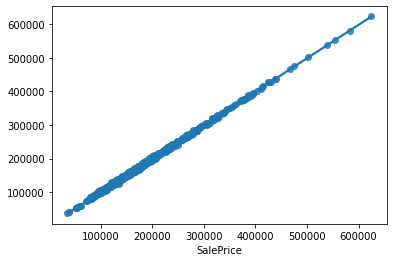

In [78]:
sb.regplot(x = ytrain, y = ypred_train, data=train)
#sb.lmplot(x = ytrain, y = ypred_train, data=train)


**LASSO REGRESSION**

In [79]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=100, max_iter=1000, random_state=13 )
lassoreg=lasso.fit(xtrain, ytrain)
ypred=lasso.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.343e+10, tolerance: 5.669e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [80]:
rmselasso=np.sqrt(MSE(np.log(ytrain), np.log(lassoreg.predict(xtrain))))
train_score=lassoreg.score(xtrain, ytrain)
test_score=lassoreg.score(xtest, ytest)

model_results = pd.DataFrame([['Lasso Regression', 
           train_score, test_score, rmselasso]], columns = 
          ['Method', 'Train Score','Test Score','RMSE'])

results = results.append(model_results, ignore_index = True)  
results = results.sort_values(["Train Score"], ascending = False)
print (results)

             Method  Train Score  Test Score      RMSE
0           XGBoost     0.998986    0.878019  0.016052
1  Lasso Regression     0.933128    0.856093  0.104582


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


RANDOM FOREST REGRESSION
**bold text**

In [81]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor(n_estimators=500, random_state=13)
RF_reg=RF.fit(xtrain, ytrain)
ypred=RF.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [82]:
rmserf= np.sqrt(MSE(np.log(ytrain), np.log(RF_reg.predict(xtrain))))
train_score= RF_reg.score(xtrain, ytrain)
test_score= RF_reg.score(xtest, ytest)

model_results = pd.DataFrame([['Random Forest Regression', 
           train_score, test_score, rmserf]], columns = 
          ['Method', 'Train Score','Test Score','RMSE'])

results = results.append(model_results, ignore_index = True)  
results = results.sort_values(["Train Score"], ascending = False)
print (results)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


                     Method  Train Score  Test Score      RMSE
0                   XGBoost     0.998986    0.878019  0.016052
2  Random Forest Regression     0.979360    0.865660  0.058431
1          Lasso Regression     0.933128    0.856093  0.104582


**DESICION TREE REGRESSION**

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
DT=DecisionTreeRegressor(criterion = 'mse', max_depth=15)
DT_reg=DT.fit(xtrain, ytrain)
ypred=DT.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [84]:
rmsedt= np.sqrt(MSE(np.log(ytrain), np.log(DT_reg.predict(xtrain))))
train_score= DT_reg.score(xtest, ytest)
test_score= DT_reg.score(xtrain, ytrain)

model_results = pd.DataFrame([['Decision Tree', 
           train_score, test_score, rmsedt]], columns = 
          ['Method', 'Train Score','Test Score','RMSE'])

results = results.append(model_results, ignore_index = True)  
results = results.sort_values(["Train Score"], ascending = False)
print (results)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


                     Method  Train Score  Test Score      RMSE
0                   XGBoost     0.998986    0.878019  0.016052
1  Random Forest Regression     0.979360    0.865660  0.058431
2          Lasso Regression     0.933128    0.856093  0.104582
3             Decision Tree     0.671849    0.999826  0.006335


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


**KNN REGRESSION**

In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [86]:
KNN= KNeighborsRegressor(n_neighbors=7)
knn_model=KNN.fit(xtrain, ytrain)
ypred=KNN.predict(xtest)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [87]:
rmseknn=np.sqrt(MSE(np.log(ytrain), np.log(knn_model.predict(xtrain))))
train_score= knn_model.score(xtest, ytest)
test_score= knn_model.score(xtrain, ytrain)

model_results = pd.DataFrame([['K-Nearest Neighbors', 
           train_score, test_score, rmseknn]], columns = 
          ['Method', 'Train Score','Test Score','RMSE'])

results = results.append(model_results, ignore_index = True)  
results = results.sort_values(["Train Score"], ascending = False)
print (results)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


                     Method  Train Score  Test Score      RMSE
0                   XGBoost     0.998986    0.878019  0.016052
1  Random Forest Regression     0.979360    0.865660  0.058431
2          Lasso Regression     0.933128    0.856093  0.104582
4       K-Nearest Neighbors     0.706658    0.794485  0.170597
3             Decision Tree     0.671849    0.999826  0.006335


**MODEL RESULT**

In [88]:
#Compare the results
print(results)

                     Method  Train Score  Test Score      RMSE
0                   XGBoost     0.998986    0.878019  0.016052
1  Random Forest Regression     0.979360    0.865660  0.058431
2          Lasso Regression     0.933128    0.856093  0.104582
4       K-Nearest Neighbors     0.706658    0.794485  0.170597
3             Decision Tree     0.671849    0.999826  0.006335


**PREDICTION SALE PRICE**

In [89]:
#predict the data using the highest significant model
ypredict_xgb= xgb_reg.predict(test)
ypredict_xgb

#salesprice=train.SalePrice

array([201639.73, 216427.73, 222775.03, ..., 216560.5 , 205845.02,
       225546.5 ], dtype=float32)

In [90]:
pred_result = pd.DataFrame({"SalePrice pred":ypredict_xgb})
pred_result.head(10)

,SalePrice pred
0,201639.734375
1,216427.734375
2,222775.031250
3,226663.125000
4,218230.250000
5,222792.562500
6,193468.859375
7,226878.250000
8,211488.046875
9,197212.468750


In [91]:
pred_result.to_csv('submissionxgb.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
